In [1]:
%pip install numpy pandas matplotlib seaborn scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Importando as bibliotecas necessárias

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [3]:
# Configurando o estilo dos gráficos

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Definindo os conjuntos de dados

grupo1 = np.array([12, 15, 18, 22, 22, 25, 28, 30, 35, 40])
grupo2 = np.array([15, 18, 21, 25, 25, 28, 31, 33, 38, 43])

In [ ]:
# 1. Calculando as estatísticas descritivas

# Para o Grupo 1

media_g1 = np.mean(grupo1)
variancia_g1 = np.var(grupo1, ddof=1)  # ddof=1 para variância amostral
q1_g1 = np.percentile(grupo1, 25)
q3_g1 = np.percentile(grupo1, 75)
iqr_g1 = q3_g1 - q1_g1

# Para o Grupo 2

media_g2 = np.mean(grupo2)
variancia_g2 = np.var(grupo2, ddof=1)
q1_g2 = np.percentile(grupo2, 25)
q3_g2 = np.percentile(grupo2, 75)
iqr_g2 = q3_g2 - q1_g2

# Exibindo os resultados das estatísticas descritivas
print("Estatísticas Descritivas:")
print(f"Grupo 1: Média = {media_g1:.2f}, Variância = {variancia_g1:.2f}, IQR = {iqr_g1:.2f}")
print(f"Grupo 2: Média = {media_g2:.2f}, Variância = {variancia_g2:.2f}, IQR = {iqr_g2:.2f}")

In [6]:
# 2. Teste de normalidade (Shapiro-Wilk)

# Para o Grupo 1
shapiro_g1 = stats.shapiro(grupo1)

# Para o Grupo 2
shapiro_g2 = stats.shapiro(grupo2)

print("\nTeste de Normalidade (Shapiro-Wilk):")
print(f"Grupo 1: Estatística = {shapiro_g1.statistic:.4f}, p-valor = {shapiro_g1.pvalue:.4f}")
print(f"Grupo 2: Estatística = {shapiro_g2.statistic:.4f}, p-valor = {shapiro_g2.pvalue:.4f}")


Teste de Normalidade (Shapiro-Wilk):
Grupo 1: Estatística = 0.9794, p-valor = 0.9617
Grupo 2: Estatística = 0.9794, p-valor = 0.9617


In [7]:
# 3. Decidindo qual teste usar com base na normalidade

alpha = 0.05
normal_g1 = shapiro_g1.pvalue > alpha
normal_g2 = shapiro_g2.pvalue > alpha

print(f"\nGrupo 1 tem distribuição normal? {'Sim' if normal_g1 else 'Não'}")
print(f"Grupo 2 tem distribuição normal? {'Sim' if normal_g2 else 'Não'}")

# Realizando o teste apropriado
if normal_g1 and normal_g2:
    # Teste t de Student para amostras independentes
    t_stat, p_valor = stats.ttest_ind(grupo1, grupo2)
    teste_usado = "t de Student"
    estatistica = t_stat
else:
    # Teste de Mann-Whitney
    u_stat, p_valor = stats.mannwhitneyu(grupo1, grupo2, alternative='two-sided')
    teste_usado = "Mann-Whitney"
    estatistica = u_stat

print(f"\nResultado do teste {teste_usado}:")
print(f"Estatística = {estatistica:.4f}, p-valor = {p_valor:.4f}")
print(f"Com α = {alpha}, {'rejeitamos' if p_valor < alpha else 'não rejeitamos'} a hipótese nula.")



Grupo 1 tem distribuição normal? Sim
Grupo 2 tem distribuição normal? Sim

Resultado do teste t de Student:
Estatística = -0.7639, p-valor = 0.4548
Com α = 0.05, não rejeitamos a hipótese nula.


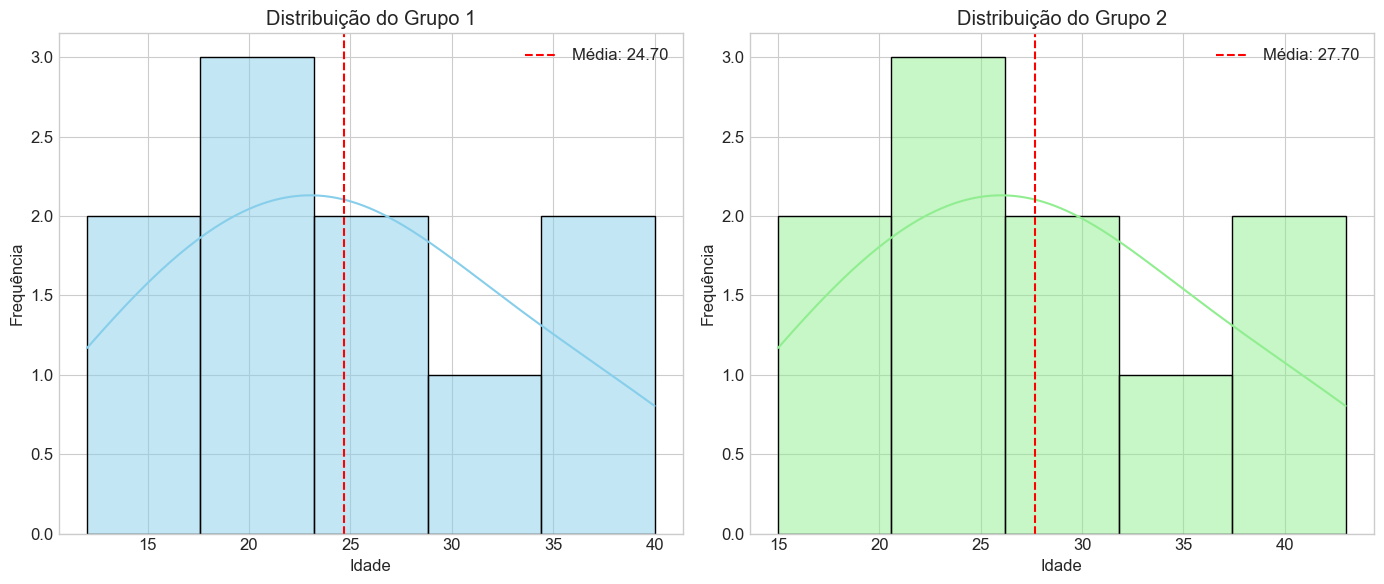

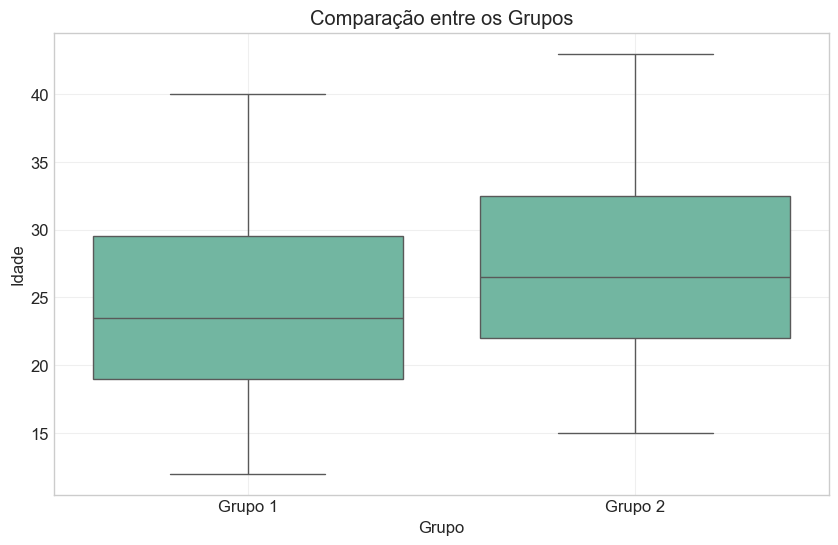


Resumo final da análise:
Os grupos têm distribuição normal? Sim
Teste estatístico utilizado: t de Student
Resultado: p-valor = 0.4548 (α = 0.05)
Não há uma diferença estatisticamente significativa entre os grupos.


In [8]:
# 4. Visualizações dos dados

# Criando um DataFrame para facilitar a visualização
df = pd.DataFrame({
    'Idade': np.concatenate([grupo1, grupo2]),
    'Grupo': ['Grupo 1']*len(grupo1) + ['Grupo 2']*len(grupo2)
})

# Histogramas
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(grupo1, kde=True, color='skyblue')
plt.axvline(media_g1, color='red', linestyle='--', label=f'Média: {media_g1:.2f}')
plt.title('Distribuição do Grupo 1')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(grupo2, kde=True, color='lightgreen')
plt.axvline(media_g2, color='red', linestyle='--', label=f'Média: {media_g2:.2f}')
plt.title('Distribuição do Grupo 2')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.legend()

plt.tight_layout()
plt.savefig('histogramas.png', dpi=300, bbox_inches='tight')
plt.show()

# Boxplot comparativo
plt.figure(figsize=(10, 6))
sns.boxplot(x='Grupo', y='Idade', data=df)
plt.title('Comparação entre os Grupos')
plt.ylabel('Idade')
plt.grid(True, alpha=0.3)
plt.savefig('boxplot.png', dpi=300, bbox_inches='tight')
plt.show()

# Exportando os dados para um CSV
df.to_csv('dados_grupos.csv', index=False)

# Resumo final
print("\nResumo final da análise:")
print(f"Os grupos têm distribuição normal? {'Sim' if (normal_g1 and normal_g2) else 'Não'}")
print(f"Teste estatístico utilizado: {teste_usado}")
print(f"Resultado: p-valor = {p_valor:.4f} (α = {alpha})")
if p_valor < alpha:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há uma diferença estatisticamente significativa entre os grupos.")